## Section 3: Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Decision Tree from SKLearn
from sklearn import tree
from sklearn.tree import export_text
import graphviz

#train and tests spliting
from sklearn.model_selection import train_test_split

#metrics for the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [3]:
LDF = pd.read_csv('LDF')

In [4]:
#LDF['bankruptcy'].replace(0,"Not Bankrupt", inplace = True)
#LDF['bankruptcy'].replace(1,"Bankrupt", inplace = True)

In [14]:
X = LDF.iloc[:]
y = LDF['bankruptcy']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=26)

In [16]:
y_test.count()

8681

In [17]:
clf = tree.DecisionTreeClassifier(min_samples_split=20, max_depth = 6)
clf = clf.fit(X_train, y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
y_train.count()

34724

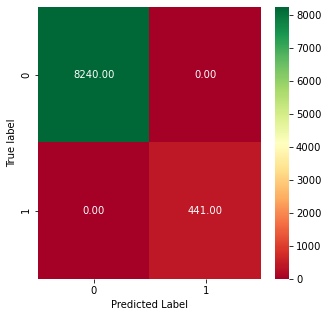

In [20]:
plot_cm(y_pred, y_test)

In [21]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8240
           1       1.00      1.00      1.00       441

    accuracy                           1.00      8681
   macro avg       1.00      1.00      1.00      8681
weighted avg       1.00      1.00      1.00      8681



[Text(167.4, 163.07999999999998, 'X[64] <= 0.5\ngini = 0.091\nsamples = 34724\nvalue = [33074, 1650]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 33074\nvalue = [33074, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1650\nvalue = [0, 1650]')]

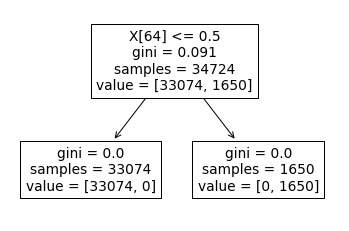

In [22]:
tree.plot_tree(clf)